# Pymaceuticals Inc.
---

### Analysis

- From the analysis, Capomulin and Ramicane appear more effective in reducing the tumor volume as evidenced by the lower mean and median tumor volumes in the box plots compared to Infubinol and Ceftamin. The scatter plot and linear regression for Capomulin-treated mice show a strong positive association between mouse weight and tumor volume, suggesting heavier mice tend to have larger tumors.

- Additionally, gender distribution of mice in the study was relatively balanced.

- Overall, Capomulin and Ramicane might be promising drug regimens for further studies due to their effectiveness in controlling tumor growth compared to other treatments in the study.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
print("Total mice:", combined_data['Mouse ID'].nunique())

Total mice: 249


In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate entries:", duplicates)

Duplicate entries:     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = combined_data[combined_data['Mouse ID'] == 'g989']
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice in the clean DataFrame:", clean_data['Mouse ID'].nunique())

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Generate a summary statistics table
stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stats = stats.agg(['mean', 'median', 'var', 'std', 'sem'])
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

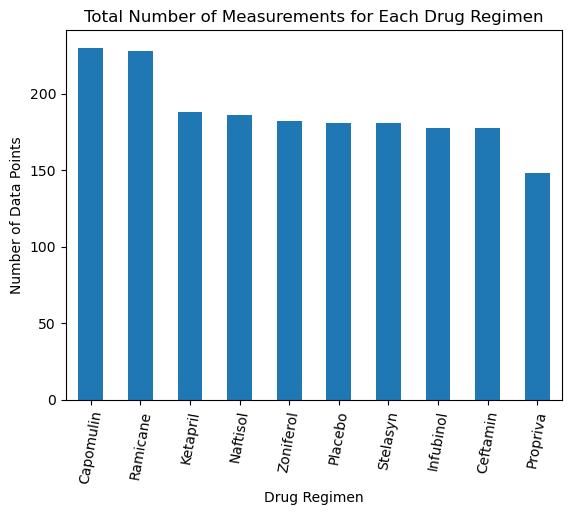

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=80)
plt.title('Total Number of Measurements for Each Drug Regimen')
plt.show()

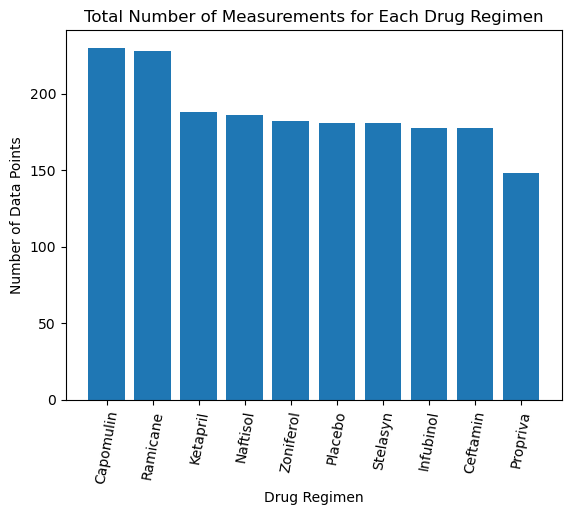

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_data['Drug Regimen'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=80)
plt.title('Total Number of Measurements for Each Drug Regimen')
plt.show()

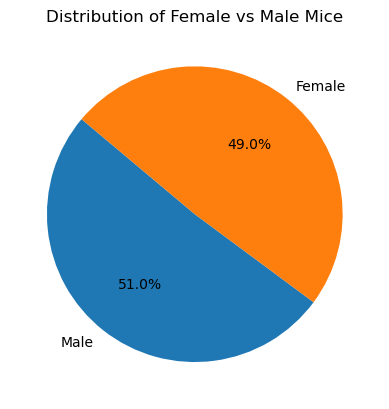

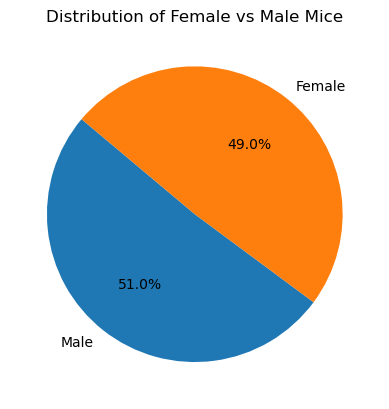

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
clean_data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')
plt.show()
# Get the unique mice with their gender
sex_counts = clean_data['Sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs Male Mice')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_data = []

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
for regimen in target_regimens:
    regimen_data = clean_data[clean_data['Drug Regimen'] == regimen]
    final_volume = regimen_data.groupby('Mouse ID').max()['Timepoint']
    volume_data = pd.merge(final_volume, clean_data, on=('Mouse ID','Timepoint'), how="left")
   

# Create empty list to fill with tumor vol data (for plotting)
    final_tumor_vol_data.append(volume_data['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = volume_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
outliers = volume_data[(volume_data['Tumor Volume (mm3)'] < lower_bound) |
                           (volume_data['Tumor Volume (mm3)'] > upper_bound)]
print(f"{regimen}'s potential outliers: {outliers}")

Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


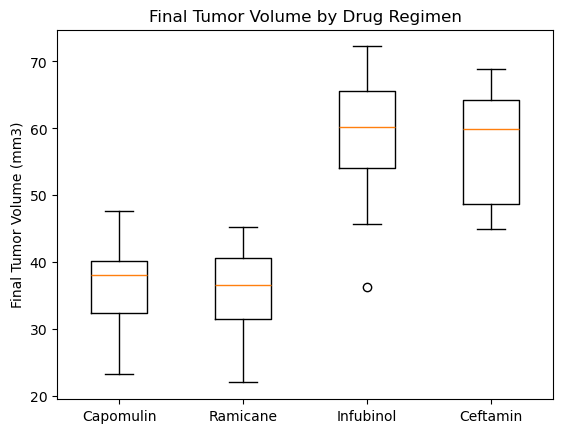

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(final_tumor_vol_data, labels=target_regimens)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume by Drug Regimen')
plt.show()

## Line and Scatter Plots

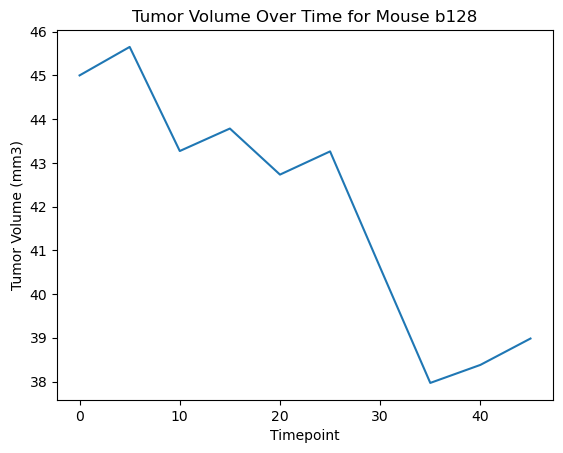

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'b128'
specific_mouse_data = clean_data[clean_data['Mouse ID'] == mouse_id]
plt.plot(specific_mouse_data['Timepoint'], specific_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate average tumor volume per mouse
capomulin_avg_tumor = capomulin_data.groupby('Mouse ID').agg(
    Avg_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')
).reset_index()

# Generate scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor['Weight'], capomulin_avg_tumor['Avg_Tumor_Volume'])
plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


NameError: name 'capomulin_data' is not defined

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate correlation coefficient
correlation = st.pearsonr(capomulin_avg_tumor['Weight'], capomulin_avg_tumor['Avg_Tumor_Volume'])[0]
print(f"Correlation coefficient: {correlation}")

slope, intercept, r_value, p_value, std_err = st.linregress(
    capomulin_avg_tumor['Weight'], capomulin_avg_tumor['Avg_Tumor_Volume']
)

regress_values = capomulin_avg_tumor['Weight'] * slope + intercept
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor['Weight'], capomulin_avg_tumor['Avg_Tumor_Volume'])
plt.plot(capomulin_avg_tumor['Weight'], regress_values, color='red')
plt.title("Capomulin: Mouse Weight vs. Average Tumor Volume with Regression Line")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()